# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
*Original data*

- booking_id : Same as description without missing values
- months_as_member : Same as description without missing values, minimum is 1 month
- weight : 20 missing values, I replaced missing values with the overall average weight. The minimum weight is not 40.00 kg but 55.41kg.
- days_before : Same as description without missing values, remove the texts "days" and change the wholce column into type "int" 
- day_of_week : Same as description without missing values, there is different labels should be same such as "Wednesday" and "Wed".I change the class in only 3 letters
- time : Same as description without missing values
- category : replace 13 missing values "-" to unknown
- attended :　Same as description without missing values

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
df = pd.read_csv("fitness_class_2212.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
None


In [25]:
print("The minimum number of months as a member:",min(df["months_as_member"]))

The minimum number of months as a member: 1


In [26]:
# Replace missing value of weight and check the minimum of the weight
df_mod = df.fillna(df["weight"].mean())
print(df_mod.info())
print("the minimum weight is",df_mod["weight"].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
None
the minimum weight is 55.41


In [27]:
#Remove "days" in days_before, make the column"days_before" to the type int
df_mod["days_before"] = df_mod["days_before"].str.replace(" days","")
df_mod["days_before"] = df_mod["days_before"].astype("int")
print(df_mod.info())

In [28]:
# Take the 3 letters in each value, make the data consistent
df_mod["day_of_week"] = df_mod["day_of_week"].str[:3]

In [29]:
#replace "-" to unknown
df_mod["category"] = df_mod["category"].replace("-","unknown")
print(df_mod.iloc[55])

booking_id               56
months_as_member         17
weight                71.35
days_before               4
day_of_week             Tue
time                     PM
category            unknown
attended                  0
Name: 55, dtype: object


## Task 2
*The observations of bookings are not balance. There are 1046 people not attending more than 454 people who attended.*

In [30]:
#a
df_mod.select_dtypes(['object','bool']).nunique()

day_of_week    7
time           2
category       6
dtype: int64

day_of_weekhas the most obsevcations

In [67]:
attendence = df_mod[df_mod["attended"]==1]["attended"].count()
absence = df_mod[df_mod["attended"]==0]["attended"].count()
print("Total bookings:",len(df_mod))
print("attendence",attendence)
print("absence",absence)

Total bookings: 1500
attendence 454
absence 1046


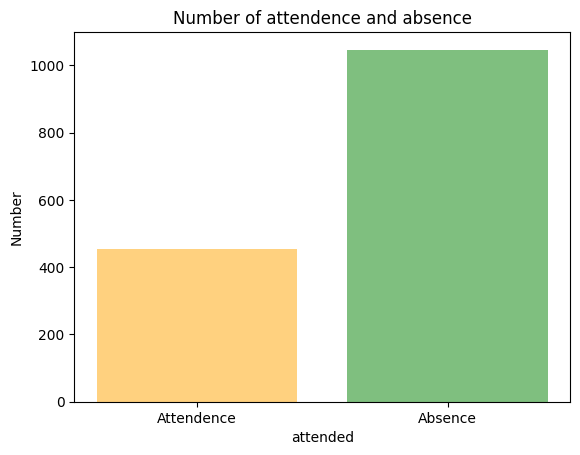

In [32]:
x = ["Attendence","Absence"]
y = [attendence,absence]
c = ["orange","green"]
plt.bar(x,y,color = c ,alpha = 0.5)
plt.title("Number of attendence and absence")
plt.xlabel("attended")
plt.ylabel("Number")
plt.show()

## Task 3
*The number of moths as a member is a skewed distribution. Most of the months as member are from 8 months to 19 months. The median of the distribution is 12 months. There are still lots of outliers over 40 months.*

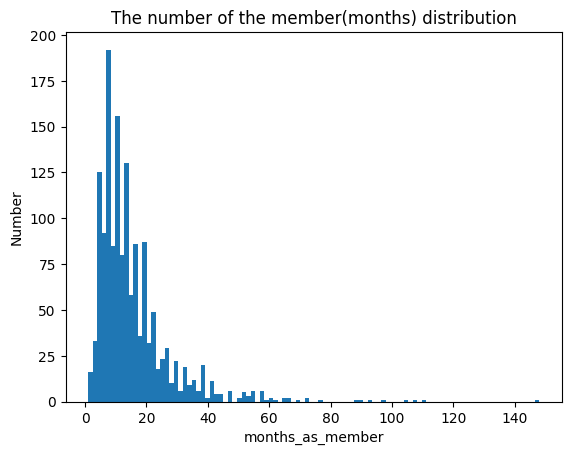

In [33]:
plt.hist(x = df_mod['months_as_member'],bins = 100)
plt.xlabel("months_as_member")
plt.ylabel("Number")
plt.title("The number of the member(months) distribution")
plt.show()

19.0
8.0
12.0


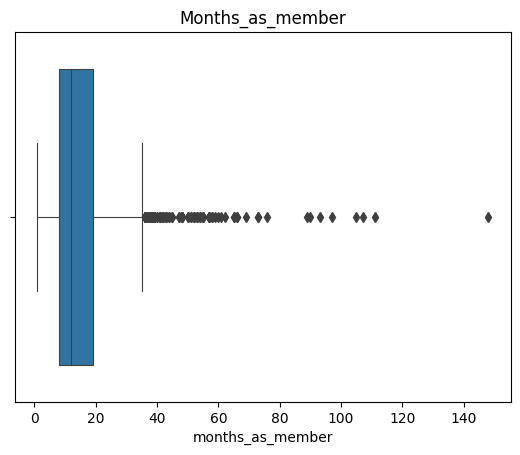

In [34]:
sns.boxplot(data=df_mod, x='months_as_member',linewidth=0.8).set(title='Months_as_member')
upper_quartile = np.percentile(df_mod["months_as_member"], 75)
lower_quartile = np.percentile(df_mod["months_as_member"], 25)
print(upper_quartile)
print(lower_quartile)
print(np.median(df_mod["months_as_member"]))

## Task 4
*The median of months as memeber is higher in the attendence boxplot. It points that when the person who has been a member longer,the attendence probability is higher.*

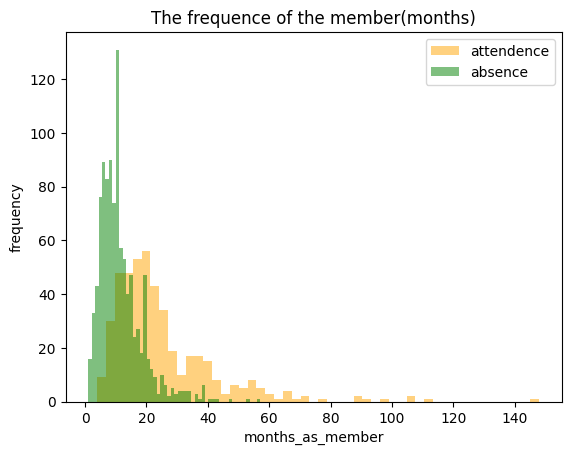

In [35]:

kwargs = dict(alpha = 0.5, bins = 50)

absence = df_mod.loc[df_mod.attended ==0,'months_as_member']
attendence = df_mod.loc[df_mod.attended ==1, "months_as_member"]

plt.hist(attendence , **kwargs, color ="orange",label = "attendence")
plt.hist(absence,**kwargs, color ="green",label = "absence")

plt.xlabel("months_as_member")
plt.ylabel("frequency")
plt.legend()
plt.title("The frequence of the member(months)")
plt.show()

[Text(0.5, 1.0, 'Months_as_member Vs attended')]

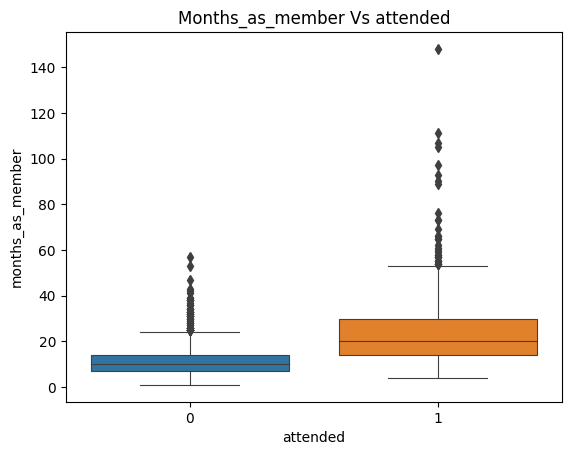

In [36]:
sns.boxplot(data=df_mod, x='attended',y='months_as_member',linewidth=0.8).set(title='Months_as_member Vs attended')

## Task 5
*As the output(attended) are only 0 and 1. 0 and 1 are sort of labels. The problem can be solved by classification model. A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.* 

## Task 6
*Write your description here*
First replace the object data into the numeric data. Furtheremore, the total number of data is 1500, and the number of attendence is only 454. The number of absence is 1046. The whole population is inbalanced. As the result, I create a new sample size with 908 in total, 454 attendence, 454 absence. The first baseline model I choose is logistic regression. The reason is that the output is only 0 and 1. The logistic regression can predict the probability between 0 and 1. For the classification model, I change the character into number.

In [37]:
#pre-preocess data change character to number
dic_weekday = {"Mon":1,"Tue":2,"Wed":3,"Thu":4,"Fri":5,"Sat":6,"Sun":7}
dic_time = {"AM":-1,"PM":1}
dic_category = {"Yoga":1,"Aqua":2,"Strength":3,"HIIT":4,"Cycling":5,"unknown":0}

df_for_model =df_mod.copy()
df_for_model.replace({"day_of_week": dic_weekday,"time":dic_time,"category":dic_category},inplace=True)

print(df_for_model.head())

   booking_id  months_as_member  weight  ...  time  category  attended
0           1                17   79.56  ...     1         3         0
1           2                10   79.01  ...    -1         4         0
2           3                16   74.53  ...    -1         3         0
3           4                 5   86.12  ...    -1         5         0
4           5                15   69.29  ...    -1         4         0

[5 rows x 8 columns]


In [42]:
#create a new sample size with 908, 454 attendence, 454 absence
attendence_df = df_for_model[df_for_model["attended"]==1]
absence_df = df_for_model[df_for_model["attended"]==0].sample(n = len(attendence_df))
new_df = pd.concat([attendence_df,absence_df])
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 8 to 870
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        908 non-null    int64  
 1   months_as_member  908 non-null    int64  
 2   weight            908 non-null    float64
 3   days_before       908 non-null    int64  
 4   day_of_week       908 non-null    int64  
 5   time              908 non-null    int64  
 6   category          908 non-null    int64  
 7   attended          908 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 63.8 KB
None


In [43]:
#drop the incorrelation column "booking_id" and create features columns and response columns

In [44]:
X = new_df.drop(["attended","booking_id"],axis = 1)
y = new_df["attended"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [69]:
#First model logist regression
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
log = LogisticRegression().fit(X_train, y_train)
print(f"Logistic regression accuracy for training data:%.2f"%(log.score(X_train,y_train)*100),"%")

Logistic regression accuracy for training data:73.55 %


## Task 7
*Decision tree*

In [68]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0, max_depth=6).fit(X_train, y_train)
print(f"Decision tree for training data:%.2f"%(tree.score(X_train,y_train)*100),"%")

Decision tree for training data:79.20 %


## Task 8
The first baseline model I choose is logistic regression. The reason is that the output is only 0 and 1. The logistic regression can predict the probability between 0 and 1. The second model I choose is Decision Tree. Decision Tree is a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

## Task 9
*Write your description here*

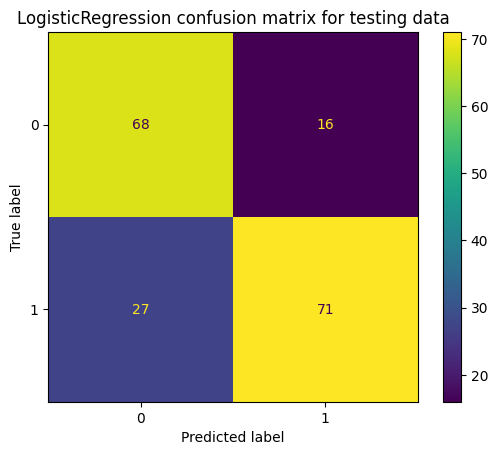

Logistic regression accuracy for training data:73.55 %
Logistic regression accuracy for testing data:76.37: %


In [65]:
y_pred = log.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.title(f"LogisticRegression confusion matrix for testing data")
plt.show()
print(f"Logistic regression accuracy for training data:%.2f"%(log.score(X_train,y_train)*100),"%")
print(f"Logistic regression accuracy for testing data:%.2f:"%(log.score(X_test, y_test)*100),"%")


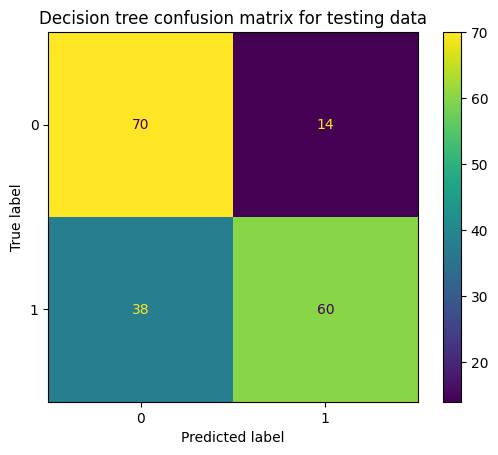

Decision tree for training data:79.20 %
Decision tree accuracy for testing data:71.43: %


In [66]:
y_pred = tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.title(f"Decision tree confusion matrix for testing data")
plt.show()
print(f"Decision tree for training data:%.2f"%(tree.score(X_train,y_train)*100),"%")
print(f"Decision tree accuracy for testing data:%.2f:"%(tree.score(X_test, y_test)*100),"%")


From the training data, we can see decision tree classify data better. However,we should focus on the testing data. The accuracy of the Logitic regression is higher than decision tree about 5%. The logistic regression has better performance.

## Task 10
The logistic regression has better performance.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam